In [2]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

In [3]:
# Files to load

city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
# Read ride data file and store it ina pandas DataFrame

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [9]:
# Inspect City Data DF
# 1. Get all rows that contain null values
## Count all columns/rows
city_data_df.count()
## Find to make sure there are zero null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
# Inspect City Data DF
# 2. Make sure the driver_count column has an integer data type.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
# Inspect City Data DF
# 3. Find out how many data points there are for each type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
# Get the number of data point from Urban Cities.
sum(city_data_df["type"]=='Urban')

66

In [16]:
# Get the number of data point from Suburban and Rural Cities.
sum(city_data_df["type"]=='Suburban')

36

In [15]:
sum(city_data_df["type"]=='Rural')

18

In [18]:
# Inspect Ride Data DataFrame
# Get the columns and rows that are not null

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [19]:
# Check rows and columns for null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [20]:
# Get Datatypes of each columns
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [21]:
# Merge Dataframes together
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

# Display the dataframe

pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [22]:
# Create the Urban City DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# Create Suburban City DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [25]:
# Create Rural City DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [26]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [28]:
# Create suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [31]:
# Get Average Fare for Each City Type
urban_fare_avg = urban_cities_df.groupby(["city"]).mean()["fare"]

surburban_fare_avg = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_fare_avg = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_fare_avg.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [32]:
# Get the Average Number of Driver for Each City Type
urban_driver_avg = urban_cities_df.groupby(["city"]).mean()["driver_count"]

surburban_driver_avg = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_avg = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_avg.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

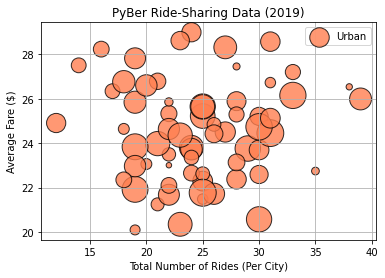

In [37]:
# Make Bubble Chart for Avg Fare vs Tot # of Rides with Bubbles size based on the total # of Drivers for each city type

# Build the scatter plots for urban cities.
plt.scatter(
    urban_ride_count, 
    urban_fare_avg,
    s=10*urban_driver_avg, c="coral",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Urban"
)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

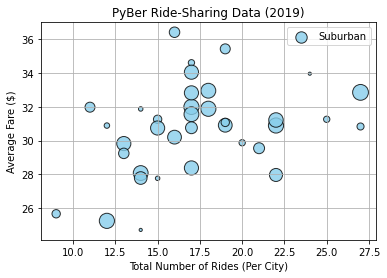

In [40]:
# Build the scatter plots for suburban cities.
plt.scatter(
    suburban_ride_count, 
    surburban_fare_avg,
    s=10*surburban_driver_avg, c="skyblue",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Suburban"
)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

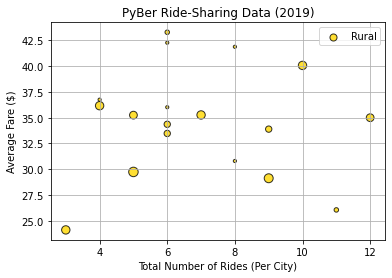

In [41]:
# Build the scatter plots for rural cities.
plt.scatter(
    rural_ride_count, 
    rural_fare_avg,
    s=10*rural_driver_avg, c="gold",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Rural"
)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

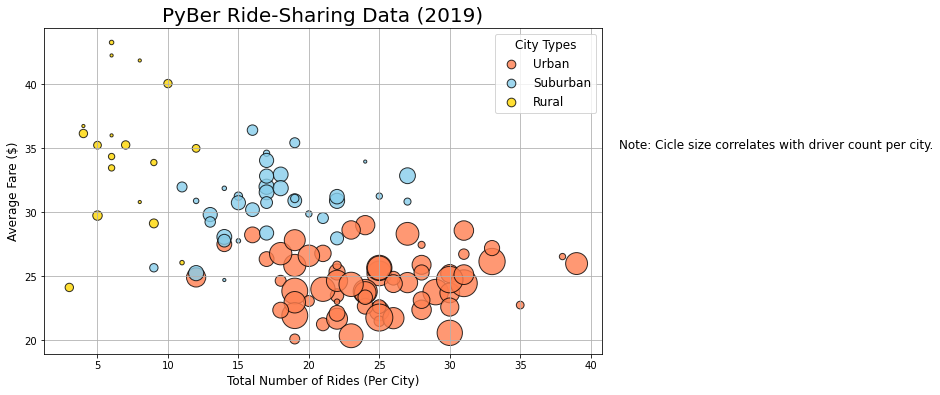

In [47]:
# Add the scatter charts for each type of city.

plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, 
    urban_fare_avg,
    s=10*urban_driver_avg, c="coral",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
    surburban_fare_avg,
    s=10*surburban_driver_avg, c="skyblue",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
    rural_fare_avg,
    s=10*rural_driver_avg, c="gold",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize= "12", mode = "Expanded", scatterpoints=1, loc="best", title="City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.

plt.text(42, 35, "Note: Cicle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()